In [2]:
import warnings

import numpy as np
import pydub
import torch
import torchaudio

from riffusion.spectrogram_params import SpectrogramParams
from riffusion.util import audio_util, torch_util
from riffusion.spectrogram_converter import SpectrogramConverter

In [8]:
# import test/output_mono.wav in pydub
warnings.filterwarnings("ignore")
sound = pydub.AudioSegment.from_wav("test/output_mono.wav")
# sound = sound.set_channels(1)

In [9]:
params = SpectrogramParams()

In [14]:
params

SpectrogramParams(stereo=False, sample_rate=44100, step_size_ms=10, window_duration_ms=100, padded_duration_ms=400, num_frequencies=512, min_frequency=0, max_frequency=10000, mel_scale_norm=None, mel_scale_type='htk', max_mel_iters=200, num_griffin_lim_iters=32, power_for_image=0.25)

In [22]:
# Create SpectrogramImageConverter object
converter = SpectrogramConverter(params)

In [17]:
sound.frame_rate

44100

In [24]:
spectro = converter.spectrogram_from_audio(sound)

In [27]:
# save spectrogram to image file
import matplotlib.pyplot as plt
plt.imsave("test/trial.png", spectro[0])

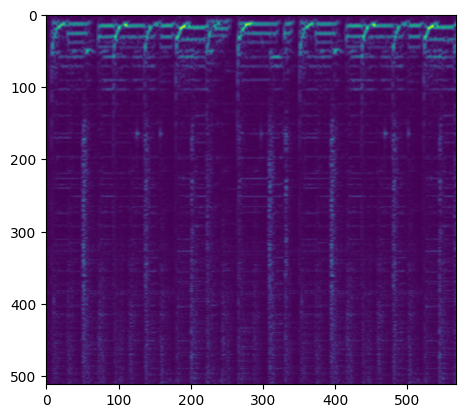

In [29]:
# plot spectrogram
plt.imshow(spectro[0])

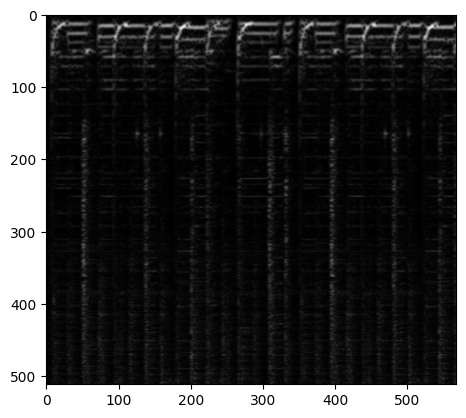

In [28]:
# plot the spectrogram in grayscale
plt.imshow(spectro[0], cmap='gray')

In [31]:
from datasets import load_dataset

# download and load the dataset
dataset = load_dataset('hyeon2/riffusion_musiccaps_datasets_768')

# print the dataset information
print(dataset.info)

FileNotFoundError: Couldn't find a dataset script at /Users/alexandreberkovic/Desktop/MIT/15.S04/music_generation/hyeon2/riffusion_musiccaps_datasets_768/riffusion_musiccaps_datasets_768.py or any data file in the same directory. Couldn't find 'hyeon2/riffusion_musiccaps_datasets_768' on the Hugging Face Hub either: FileNotFoundError: Dataset 'hyeon2/riffusion_musiccaps_datasets_768' doesn't exist on the Hub. If the repo is private or gated, make sure to log in with `huggingface-cli login`.

In [33]:
!curl -X GET "https://datasets-server.huggingface.co/first-rows?dataset=Hyeon2%2Friffusion-musiccaps-datasets-768&config=Hyeon2--riffusion-musiccaps-datasets-768&split=train" > first_rows.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54833  100 54833    0     0   166k      0 --:--:-- --:--:-- --:--:--  169k


In [34]:
import json

# read the output from the file
with open('first_rows.json') as f:
    output = f.read()

# parse the output into a dictionary
parsed_output = json.loads(output)

# print the dictionary
print(parsed_output)


{'dataset': 'Hyeon2/riffusion-musiccaps-datasets-768', 'config': 'Hyeon2--riffusion-musiccaps-datasets-768', 'split': 'train', 'features': [{'feature_idx': 0, 'name': 'image', 'type': {'_type': 'Image'}}, {'feature_idx': 1, 'name': 'text', 'type': {'dtype': 'string', '_type': 'Value'}}], 'rows': [{'row_idx': 0, 'row': {'image': {'src': 'https://datasets-server.huggingface.co/assets/Hyeon2/riffusion-musiccaps-datasets-768/--/Hyeon2--riffusion-musiccaps-datasets-768/train/0/image/image.jpg', 'height': 768, 'width': 785}, 'text': 'The low quality recording features a ballad song that contains sustained strings, mellow piano melody and soft female vocal singing over it. It sounds sad and soulful, like something you would hear at Sunday services.'}, 'truncated_cells': []}, {'row_idx': 1, 'row': {'image': {'src': 'https://datasets-server.huggingface.co/assets/Hyeon2/riffusion-musiccaps-datasets-768/--/Hyeon2--riffusion-musiccaps-datasets-768/train/1/image/image.jpg', 'height': 768, 'width': 

In [39]:
# print row 0 of the dataset
print(dataset[0])

NameError: name 'dataset' is not defined

In [36]:
# print images of the first 5 rows
for i in range(5):
    plt.imshow(parsed_output['train'][i]['image'])
    plt.show()

KeyError: 'train'